[[  3.87503953e-04   3.95890846e-04   4.38874558e-05 ...,   8.72452726e-07
    7.79154096e-06   7.15448210e-06]
 [  3.88938484e-04   3.98910907e-04   8.25822340e-05 ...,   2.51230339e-06
    9.03847586e-06   7.86838895e-06]
 [  4.30272788e-05   8.43326650e-05   2.57011542e-05 ...,   1.04082857e-06
    2.49763806e-06   1.49998554e-06]
 ..., 
 [  2.31873147e-07   3.66118285e-07   1.31431314e-07 ...,   1.89202195e-05
    6.00434996e-05   3.64000456e-05]
 [  1.14136070e-06   1.12989170e-06   2.87007592e-07 ...,   6.48763474e-05
    2.86750584e-04   2.90403232e-04]
 [  1.08704007e-06   1.09319566e-06   1.95745237e-07 ...,   4.16427681e-05
    2.81761965e-04   2.74360367e-04]]


ValueError: too many values to unpack (expected 3)

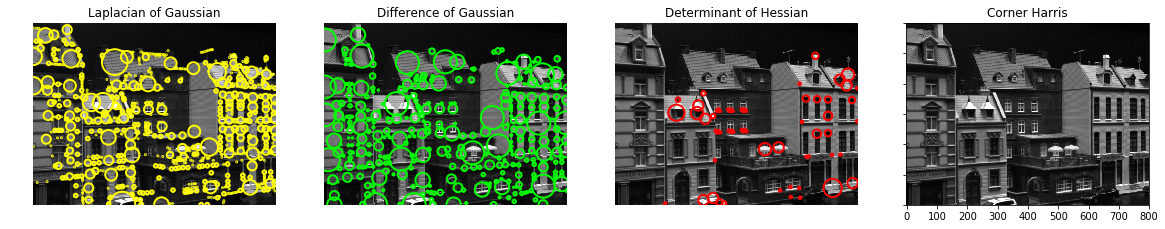

In [19]:
# http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html

from math import sqrt
from skimage import data, io, img_as_float
from skimage.feature import blob_dog, blob_log, blob_doh, corner_harris
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 15.0)

image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

image_gray = img_as_float(io.imread('Img001_diffuse_smallgray.png'))
image = img_as_float(io.imread('Img001_diffuse_smallgray.png'))

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_harris = corner_harris(image_gray)
print(blobs_harris)

blobs_list = [blobs_log, blobs_dog, blobs_doh, blobs_harris]
colors = ['yellow', 'lime', 'red', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian', 'Corner Harris']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest', cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

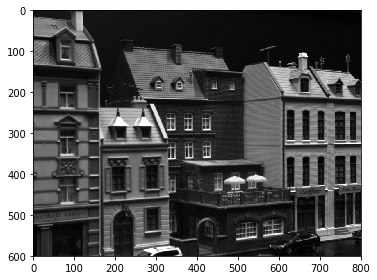

In [8]:
%matplotlib inline
from skimage import io
io.imshow(image_gray)